# 如何解决标题问题

在markdown中嵌入html：

<center><font size=6>基于Ceph的分布式资源隔离</font></center>

# 实时动态绘图

## 静态绘图

<IPython.core.display.Javascript object>


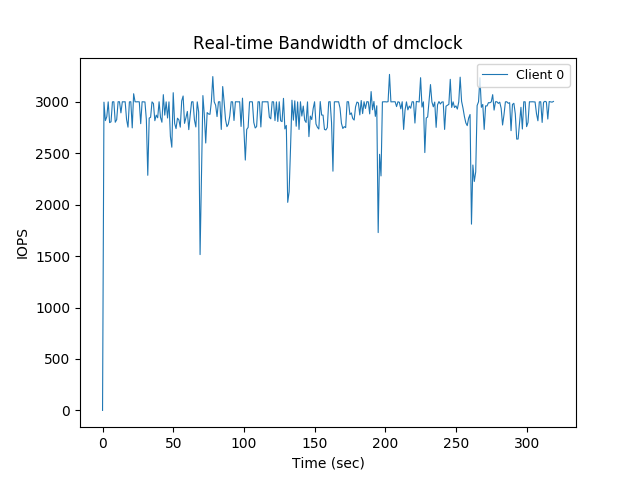

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time, re

# 从log里读取数据并做简单的过滤处理
def get_data_from_log(file_name):
    data = []
    f = open(file_name)
    for line in f:
        # 只要数据，过滤掉无用的数据
        ret = re.match('^\s+[0-9]+', line)
        if ret:
            # 把每行数据分割
            line_list = line.split()
            # 只要每行的第五个值
            data.append(float(line_list[5]) / 16 * 1024)
    f.close()
    return data

fig = plt.figure()
dmclock_ax = fig.add_subplot(111)
t =320    # 用于控制显示数据的数量

# 读取离线数据
dmclock_data_list = get_data_from_log("dmclock_log.txt")

dmclock_ax.plot(dmclock_data_list[0:t], linewidth=0.8, label="Client 0"); 
dmclock_ax.set_xlabel("Time (sec)"); dmclock_ax.set_ylabel("IOPS");
dmclock_ax.set_title("Real-time Bandwidth of dmclock");
plt.legend(loc='upper right', fontsize='9')

plt.show()

## 离线动态绘图

<IPython.core.display.Javascript object>


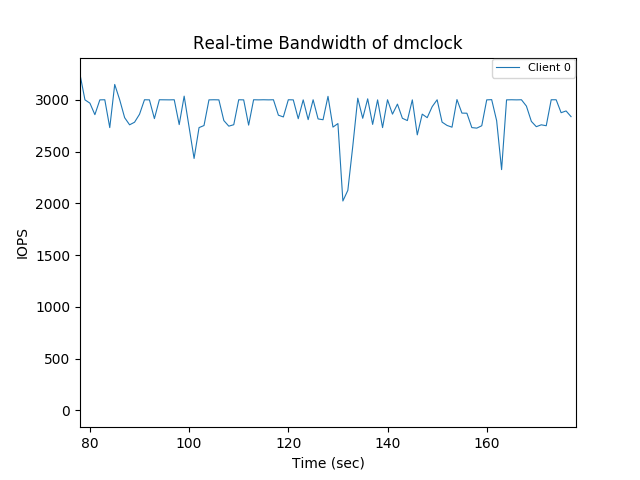

KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time, re

# 从log里读取数据并做简单的过滤处理
def get_data_from_log(file_name):
    data = []
    f = open(file_name)
    for line in f:
        # 只要数据，过滤掉无用的数据
        ret = re.match('^\s+[0-9]+', line)
        if ret:
            # 把每行数据分割
            line_list = line.split()
            # 只要每行的第五个值
            data.append(float(line_list[5]) / 16 * 1024)
    f.close()
    return data

fig = plt.figure()
dmclock_ax = fig.add_subplot(111)
plt.ion();   # 打开交互模式
fig.show();  # 显示figure
fig.canvas.draw();   # 绘制

# 读取离线数据
dmclock_data_list = get_data_from_log("dmclock_log.txt")

# 设置运行时间
figure_time = 500;
# 坐标轴长度
ticks_len = 100

for t in range(figure_time):
    # 清除上一次的绘制
    dmclock_ax.clear()
    # 添加新的折线图
    dmclock_ax.plot(dmclock_data_list[0:t], linewidth=0.8, label="Client 0");
    # 移动坐标轴
    dmclock_ax.set_xlim(max(0, t - ticks_len), max(ticks_len, t))
    dmclock_ax.set_xlabel("Time (sec)"); dmclock_ax.set_ylabel("IOPS");
    dmclock_ax.set_title("Real-time Bandwidth of dmclock");
    plt.legend(loc='upper right', borderaxespad=0.1, fontsize='8')
    # 绘制
    fig.canvas.draw();
    # 设置暂停时间，暂停时间越短动画更新越快
    plt.pause(0.5)

## 实时动态绘图

<IPython.core.display.Javascript object>


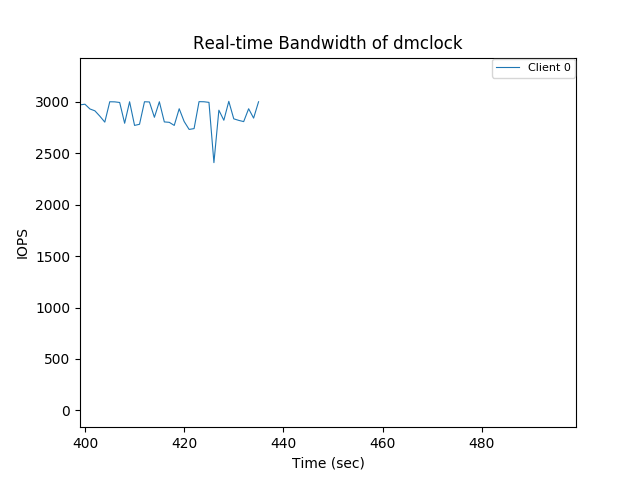

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time, re

# 从log里读取数据并做简单的过滤处理
def get_data_from_log(file_name):
    data = []
    f = open(file_name)
    for line in f:
        # 只要数据，过滤掉无用的数据
        ret = re.match('^\s+[0-9]+', line)
        if ret:
            # 把每行数据分割
            line_list = line.split()
            # 只要每行的第五个值
            data.append(float(line_list[5]) / 16 * 1024)
    f.close()
    return data

fig = plt.figure()
dmclock_ax = fig.add_subplot(111)
plt.ion();   # 打开交互模式
fig.show();  # 显示figure
fig.canvas.draw();   # 绘制

# 设置运行时间
figure_time = 500;
# 坐标轴长度
ticks_len = 100

for t in range(figure_time):
    # 清除上一次的绘制
    dmclock_ax.clear()
    # 每次读取log文件
    dmclock_data_list = get_data_from_log("dmclock_log_rt.txt")
    # 添加新的折线图
    dmclock_ax.plot(dmclock_data_list, linewidth=0.8, label="Client 0");
    # 移动坐标轴
    dmclock_ax.set_xlim(max(0, max(t, len(dmclock_data_list)) - ticks_len), max(ticks_len, max(t, len(dmclock_data_list))))
    dmclock_ax.set_xlabel("Time (sec)"); dmclock_ax.set_ylabel("IOPS");
    dmclock_ax.set_title("Real-time Bandwidth of dmclock");
    plt.legend(loc='upper right', borderaxespad=0.1, fontsize='8')
    # 绘制
    fig.canvas.draw();
    # 设置暂停时间，暂停时间越短动画更新越快
    plt.pause(0.5)

# 子图布局控制

<IPython.core.display.Javascript object>


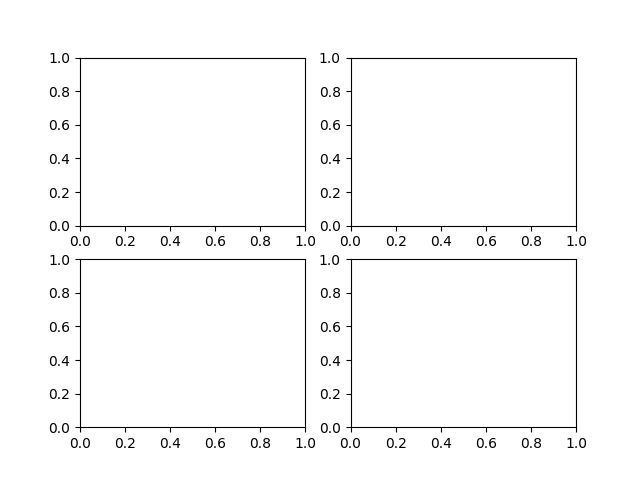

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.show()

<IPython.core.display.Javascript object>


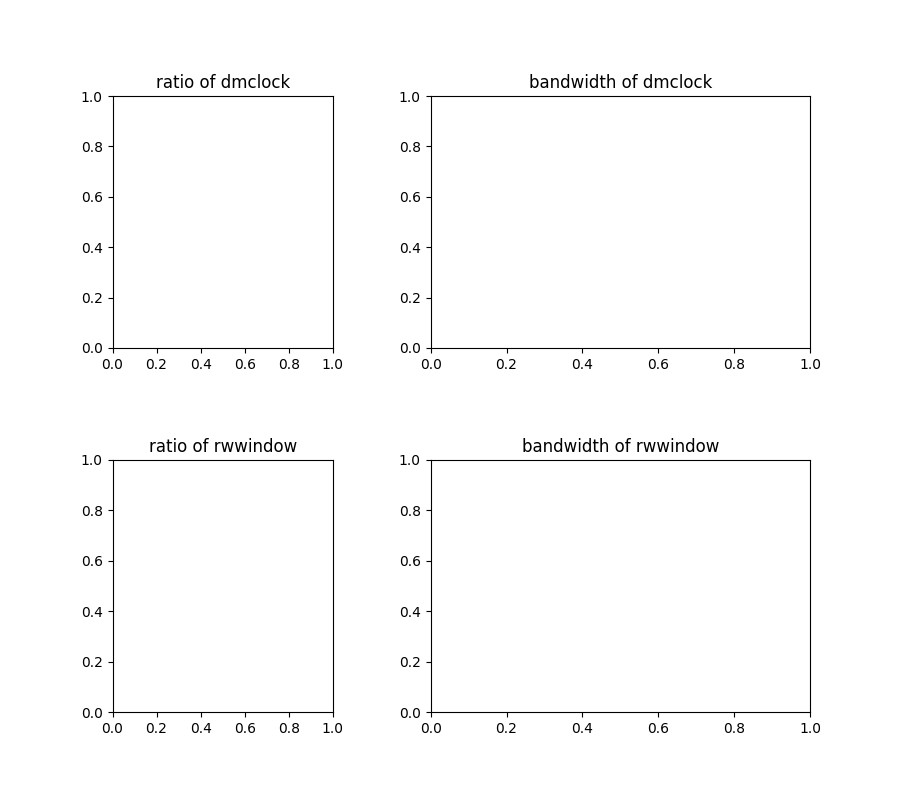

In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,8))
grid = plt.GridSpec(7, 9, wspace=0.3, hspace=0.3)
dmclock_ratio = plt.subplot(grid[0:3,0:3], title="ratio of dmclock"); 
dmclock_ax = plt.subplot(grid[0:3,4:9], title="bandwidth of dmclock")
dwclock_ratio = plt.subplot(grid[4:7,0:3], title="ratio of rwwindow"); 
dwclock_ax = plt.subplot(grid[4:7,4:9], title="bandwidth of rwwindow")


plt.show()